Cargamos librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Instalamos la ultima version de scikit-learn
!pip install -U scikit-learn

     |████████████████████████████████| 6.8MB 2.6MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [3]:
import sklearn #importamos sklearn

In [4]:
iris = sns.load_dataset("iris")

In [5]:
from sklearn.model_selection import train_test_split # importamos el modelo de seleccion

In [6]:
# vamos a crear las vareiables X y eliminamos la columna species. axis=1 por que es una columna
X = iris.drop('species', axis=1)
# vamos a crear las vareiables y con 'species es la que se quiere predecir
y = iris['species']

In [7]:
# Separar en train y test
# test_size es el tamaño del conjunto de datos de para test
# train_test_split divide arreglos o matrices en subconjuntos aleatorios de train y test. 
# Eso significa que cada vez que lo ejecute sin especificar random_state, obtendrá un resultado diferente, este es el comportamiento esperado
# pero. Por otro lado, si usa random_state=un_valor_X, puede garantizar que la salida de la Ejecución 1 será igual a la salida de la Ejecución 2 
# es decir, su división será siempre la misma.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=31)

In [9]:
from sklearn.tree import DecisionTreeClassifier # importamos arbol de decision

In [10]:
arbol = DecisionTreeClassifier() #instanciamos

In [11]:
arbol.fit(X_train,y_train) # hacemos el fit

DecisionTreeClassifier()

In [12]:
from sklearn import tree # importamos tree 

[Text(133.92000000000002, 199.32, 'X[3] <= 0.75\ngini = 0.665\nsamples = 105\nvalue = [37, 32, 36]'),
 Text(100.44000000000001, 163.07999999999998, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(167.40000000000003, 163.07999999999998, 'X[2] <= 4.85\ngini = 0.498\nsamples = 68\nvalue = [0, 32, 36]'),
 Text(66.96000000000001, 126.83999999999999, 'X[3] <= 1.65\ngini = 0.117\nsamples = 32\nvalue = [0, 30, 2]'),
 Text(33.480000000000004, 90.6, 'gini = 0.0\nsamples = 29\nvalue = [0, 29, 0]'),
 Text(100.44000000000001, 90.6, 'X[1] <= 3.0\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(66.96000000000001, 54.359999999999985, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(133.92000000000002, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(267.84000000000003, 126.83999999999999, 'X[3] <= 1.75\ngini = 0.105\nsamples = 36\nvalue = [0, 2, 34]'),
 Text(234.36, 90.6, 'X[2] <= 5.05\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(200.88000000000002, 54

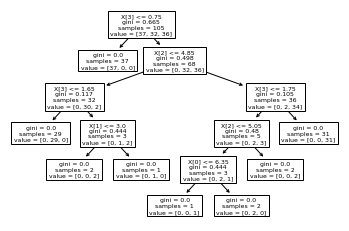

In [13]:
tree.plot_tree(arbol) # Generamos el diagrama

In [14]:
X_nombre = list(X.columns) # sacamos las columnas
classes = ['setosa', 'versicolor', 'virginica'] # sacamos las clases

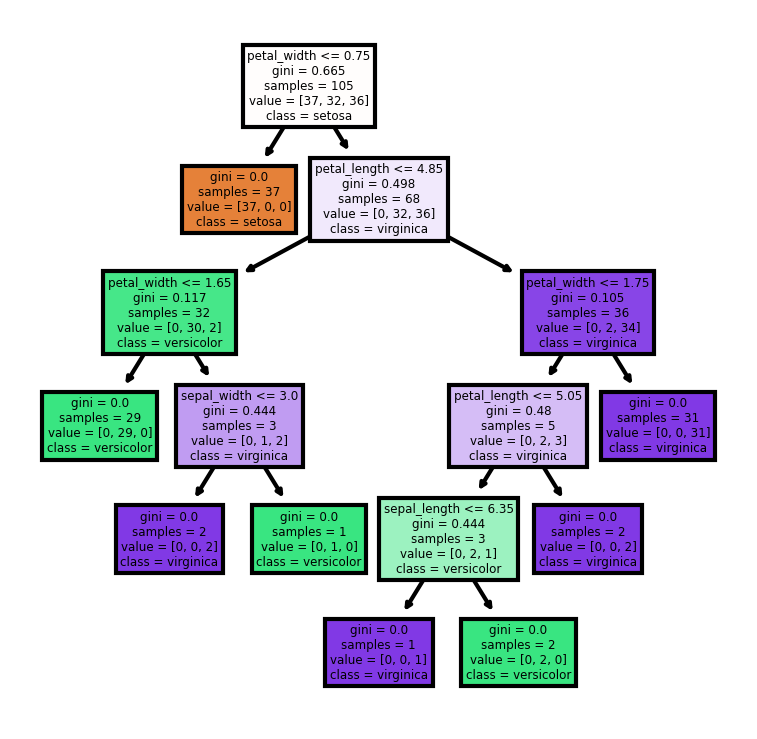

In [16]:
fig, axes = plt.subplots(nrows= 1, ncols= 1, figsize= (3,3), dpi= 300)
tree.plot_tree(
    arbol,
    feature_names= X_nombre,
    class_names= classes,
    filled= True);
fig.savefig('/content/drive/My Drive/Python | Ciencia de Datos - Machine Learning/img/arbol.png')

In [17]:
pred = arbol.predict(X_test) # predicciones

In [18]:
from sklearn.metrics import classification_report, confusion_matrix # cargamos las metricas

In [19]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

[[13  0  0]
 [ 0 16  2]
 [ 0  0 14]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.89      0.94        18
   virginica       0.88      1.00      0.93        14

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



creamos bosques aleatorios

In [22]:
from sklearn.ensemble import RandomForestClassifier # importamos 

In [23]:
rfc = RandomForestClassifier(n_estimators= 20, random_state=33) #instanciamos | n_estimators=20. == numero de bosques

In [24]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20, random_state=33)

In [25]:
rfc_pred = rfc.predict(X_test)

In [26]:
print(confusion_matrix(y_test, rfc_pred))
print(classification_report(y_test,rfc_pred))

[[13  0  0]
 [ 0 17  1]
 [ 0  0 14]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        18
   virginica       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

